# Objective
Predict profit<br>

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import patsy.builtins
import matplotlib.pyplot as plt
import sklearn.metrics as met
%matplotlib inline

<font size=5>Getting the Data and taking a look at it</font>

In [2]:
strdf = pd.read_csv("D:\\IPBA\\Statistical Modelling\\Rcode2\\50_Startups.csv")
strdf.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
strdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
#finding the correlation and plotting a heatmap
corr = strdf.corr()
corr

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

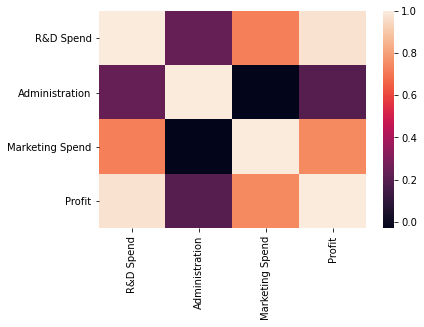

In [5]:
sns.heatmap(corr,
           xticklabels = corr.columns.values,
           yticklabels = corr.columns.values)

Analysing the predictors and the target variable<br>
Handling the outliers

In [6]:
strdf['R&D Spend'].describe()

count        50.000000
mean      73721.615600
std       45902.256482
min           0.000000
25%       39936.370000
50%       73051.080000
75%      101602.800000
max      165349.200000
Name: R&D Spend, dtype: float64

In [7]:
strdf['Marketing Spend'].describe()

count        50.000000
mean     211025.097800
std      122290.310726
min           0.000000
25%      129300.132500
50%      212716.240000
75%      299469.085000
max      471784.100000
Name: Marketing Spend, dtype: float64

In [8]:
strdf['Profit'].describe()

count        50.000000
mean     112012.639200
std       40306.180338
min       14681.400000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: Profit, dtype: float64

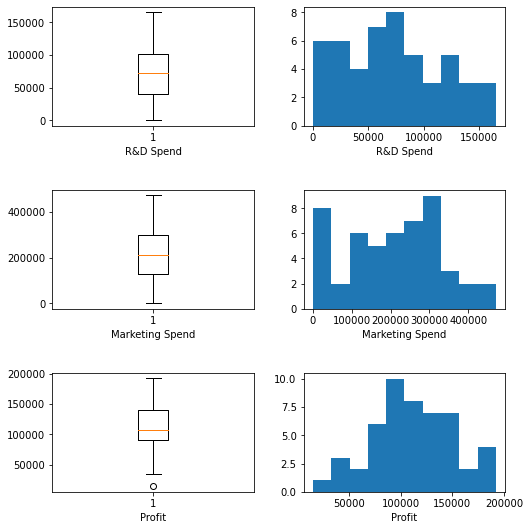

In [9]:
fig = plt.figure(figsize = (8,8))
plt.subplot(3,2,1)
plt.boxplot(strdf['R&D Spend'])
plt.xlabel('R&D Spend')
plt.subplot(3,2,2)
plt.hist(strdf['R&D Spend'])
plt.xlabel('R&D Spend')

plt.subplot(3,2,3)
plt.boxplot(strdf['Marketing Spend'])
plt.xlabel('Marketing Spend')
plt.subplot(3,2,4)
plt.hist(strdf['Marketing Spend'])
plt.xlabel('Marketing Spend')

plt.subplot(3,2,5)
plt.boxplot(strdf['Profit'])
plt.xlabel('Profit')
plt.subplot(3,2,6)
plt.hist(strdf['Profit'])
plt.xlabel('Profit')

fig.tight_layout(pad=3.0)

# Creating the model 
This is an iterative process . Using different set of predictors and removing and adding depending upon the significance as <br>
shown by the summary

In [10]:
mod = smf.ols('Profit~Q("R&D Spend")+Administration+Q("Marketing Spend")' , data = strdf)
reg = mod.fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           4.53e-30
Time:                        20:19:58   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Q("R&D Spend")           0.8057      0.045     17.846      0.000       0.715       0.897
Administration          -0.0268      0.051     -0.526      0.602      -0.130       0.076
Q("Marketing Spend")     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
prd = reg.predict()

In [12]:
residuals = reg.resid

In [13]:
residuals.std()

8945.24876846504

In [14]:
residuals.describe()

count    5.000000e+01
mean     6.941264e-11
std      8.945249e+03
min     -3.353373e+04
25%     -4.795026e+03
50%      6.265301e+01
75%      6.606496e+03
max      1.727543e+04
dtype: float64

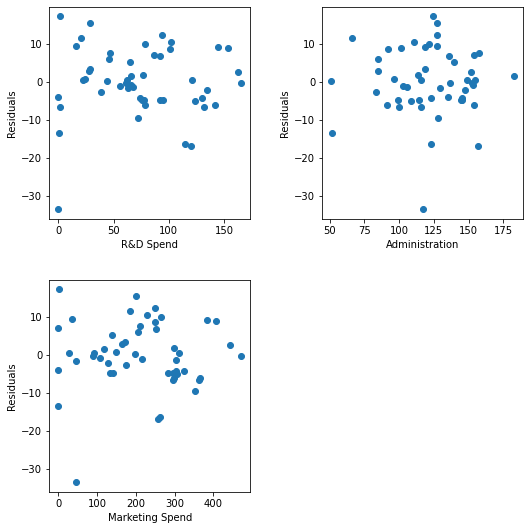

In [15]:
list_Cols = ['R&D Spend' , 'Administration' , 'Marketing Spend']
fig = plt.figure(figsize=(8,8))
for i in range(1,len(list_Cols)+1):
    plt.subplot(2,2,i)
    x = list_Cols[i-1]
    plt.scatter(strdf[x]/1000 , residuals/1000)
    plt.xlabel(x)
    plt.ylabel('Residuals')
fig.tight_layout(pad=3.0)


In [16]:
#MAE
mae = met.mean_absolute_error(strdf['Profit'] , prd)
mae

6471.450396104807

In [17]:
#MAPE
np.mean(abs((strdf['Profit'] - prd)/strdf['Profit']))

0.10601209160494114

In [18]:
mod1 = smf.ols('Profit~Q("R&D Spend")+Administration+Q("Marketing Spend")+State' , data = strdf)
reg1 = mod1.fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           1.34e-27
Time:                        20:19:58   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State[T.Florida]       198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State[T.New York]      -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
Q("R&D Spend")           0.8060      0.046     17.369      0.000       0.712       0.900
Administration          -0.0270      0.052     -0.517      0.608      -0.132       0.078
Q("Marketing Spend")     0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
strdf['State'].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

 <font size = 5>Alphabetical first category as reference and the p value tells if the other category/factor is significantly different than the reference . The 2 rows combined tell us if the state is significant or not. Since all the 3 factors are not significantly different hence the state is not significant.</font>

In [20]:
#Admin is statistically insignificant . Fitting the model without Admin . 
#Marketing is also not significant but the value is less that Admin , 
#hence checking for one more iteration after dropping Admin.
mod2 = smf.ols('Profit~Q("R&D Spend")+Q("Marketing Spend")' , data = strdf)
reg2 = mod2.fit()
residuals2 = reg2.resid
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           2.16e-31
Time:                        20:19:58   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
Q("R&D Spend")           0.7966      0.041     19.266      0.000       0.713       0.880
Q("Marketing Spend")     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<font size=5>After removing Admin & State , marketing has become more significant.<br>
This is a more desireable model, since the R^2 is also higher as compared to the model with State.<br>
Checking the residual summary and verifying the assumptions</font>

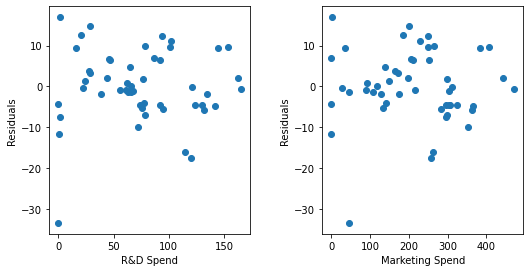

In [21]:
list_Cols = ['R&D Spend' , 'Marketing Spend']
fig = plt.figure(figsize=(8,8))
for i in range(1,len(list_Cols)+1):
    plt.subplot(2,2,i)
    x = list_Cols[i-1]
    plt.scatter(strdf[x]/1000 , residuals2/1000)
    plt.xlabel(x)
    plt.ylabel('Residuals')
fig.tight_layout(pad=3.0)

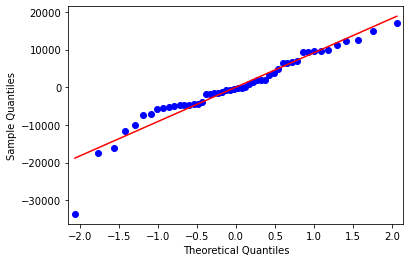

In [22]:
sm.qqplot(residuals2 , line='r')
plt.show()

In [23]:
prd2 = reg2.predict()

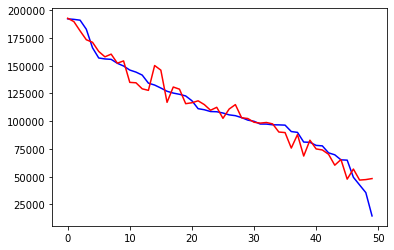

In [24]:
plt.plot(strdf['Profit'] , 'b')
plt.plot(prd2 , 'r')

(array([ 1.,  0.,  0.,  2.,  2., 12., 14.,  8.,  7.,  4.]),
 array([-33645.49446186, -28571.29441367, -23497.09436548, -18422.89431729,
        -13348.6942691 ,  -8274.49422091,  -3200.29417271,   1873.90587548,
          6948.10592367,  12022.30597186,  17096.50602005]),
 <BarContainer object of 10 artists>)

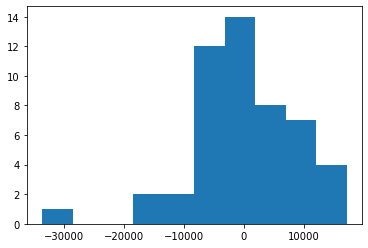

In [25]:
plt.hist(residuals2)

In [26]:
residuals2.describe()

count    5.000000e+01
mean     7.130438e-12
std      8.972060e+03
min     -3.364549e+04
25%     -4.632426e+03
50%     -4.140140e+02
75%      6.483898e+03
max      1.709651e+04
dtype: float64

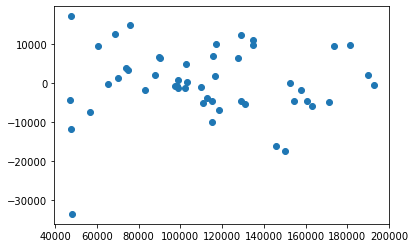

In [27]:
plt.scatter(prd2 , residuals2)

In [28]:
#MSE
mse = met.mean_absolute_error(strdf['Profit'] , prd2)
mse

6499.319940113645

In [29]:
#MAPE
mape = np.mean(abs((strdf['Profit']-prd2)/strdf['Profit']))
mape

0.10608714191402085

In [30]:
#VIF
Y,X = dmatrices('Profit~Q("R&D Spend")+Q("Marketing Spend")' , data = strdf ,return_type = 'dataframe')
Y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [31]:
X.head()

,Intercept,"Q(""R&D Spend"")","Q(""Marketing Spend"")"
0,1.0,165349.20,471784.10
1,1.0,162597.70,443898.53
2,1.0,153441.51,407934.54
3,1.0,144372.41,383199.62
4,1.0,142107.34,366168.42


In [32]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values , i)for i in range(len(X.columns))]
vif['Features'] = X.columns
vif

,VIF,Features
0,4.310924,Intercept
1,2.103206,"Q(""R&D Spend"")"
2,2.103206,"Q(""Marketing Spend"")"


<AxesSubplot:xlabel='Profit'>

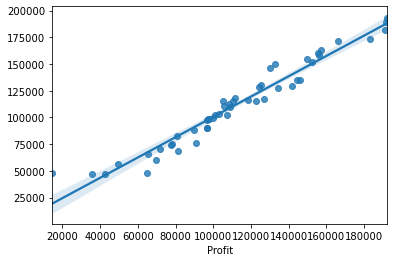

In [33]:
sns.regplot(x=strdf['Profit'] , y=prd2)